In [2]:
# Bibliotecas padrão
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Bibliotecas scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    roc_curve,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample

# Label Encoding
from sklearn.preprocessing import LabelEncoder


In [3]:
data = pd.read_csv("datasets/Churn.csv")
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())
print(data.duplicated().sum())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [4]:
data["Tenure"] = data["Tenure"].fillna(data["Tenure"].median())
print(data.isnull().sum())
print(data.dtypes)


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [5]:
print(data["Tenure"].unique())
print(data["Tenure"])


[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0.]
0        2.0
1        1.0
2        8.0
3        1.0
4        2.0
        ... 
9995     5.0
9996    10.0
9997     7.0
9998     3.0
9999     5.0
Name: Tenure, Length: 10000, dtype: float64


In [6]:
print(data[(data["Tenure"] > 0) & (data["Tenure"] < 1)])


Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [7]:
data["Tenure"] = data["Tenure"].astype(int)
print(data["Tenure"].unique())
print(data.dtypes)


[ 2  1  8  7  4  6  3 10  5  9  0]
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [8]:
# Usar Label Encoding para variáveis categóricas
le = LabelEncoder()

# Aplicar Label Encoding para cada coluna categórica
data["Gender"] = le.fit_transform(data["Gender"])
data["Surname"] = le.fit_transform(data["Surname"])
data["Geography"] = le.fit_transform(data["Geography"])
data["CustomerId"] = le.fit_transform(data["CustomerId"])

print(data.head())
print(data.dtypes)


   RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          1        2736     1115          619          0       0   42   
1          2        3258     1177          608          2       0   41   
2          3        2104     2040          502          0       0   42   
3          4        5435      289          699          0       0   39   
4          5        6899     1822          850          2       0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [9]:
# Split dos dados sem levar em consideração o balanceamento

""" Features: 
RowNumber — índice das strings de dados
CustomerId — identificador exclusivo do cliente
Surname — sobrenome
CreditScore — pontuação de crédito
Geography — país de residência
Gender — gênero
Age — idade
Tenure — período de maturação para o depósito fixo de um cliente (anos)
Balance — saldo da conta
NumOfProducts — número de produtos bancários usados pelo cliente
HasCrCard — cliente possui cartão de crédito (1 - sim; 0 - não)
IsActiveMember — cliente ativo (1 - sim; 0 - não)
EstimatedSalary — salário estimado
"""

# Target:
# Exited — o cliente saiu (1 - sim; 0 - não)


X = data.drop(columns=["Exited"])
y = data["Exited"]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=12345
)

print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)


X_train shape: (7500, 13)
X_valid shape: (2500, 13)


In [ ]:
for i in range(100, 151, 10):
    best_f1 = 0
    best_auc = 0
    for j in range(1, 11):
        model = GradientBoostingClassifier(
            n_estimators=i, max_depth=j, random_state=12345
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        if best_f1 < f1_score(y_valid, y_pred):
            best_f1 = f1_score(y_valid, y_pred)
            best_auc = roc_auc_score(y_valid, y_pred)
            best_params = (i, j)
    print(
        f"n_estimators: {i}, best max_depth: {best_params[1]}, best F1: {best_f1:.4f}, best AUC: {best_auc:.4f}"
    )


n_estimators: 100, best max_depth: 4, best F1: 0.5850, best AUC: 0.7146
n_estimators: 110, best max_depth: 6, best F1: 0.5864, best AUC: 0.7168
n_estimators: 120, best max_depth: 4, best F1: 0.5936, best AUC: 0.7197
n_estimators: 130, best max_depth: 6, best F1: 0.5900, best AUC: 0.7191


F1: 0.5936395759717314
AUC: 0.7197379372666524
Matriz de Confusão:
 [[1903   62]
 [ 283  252]]


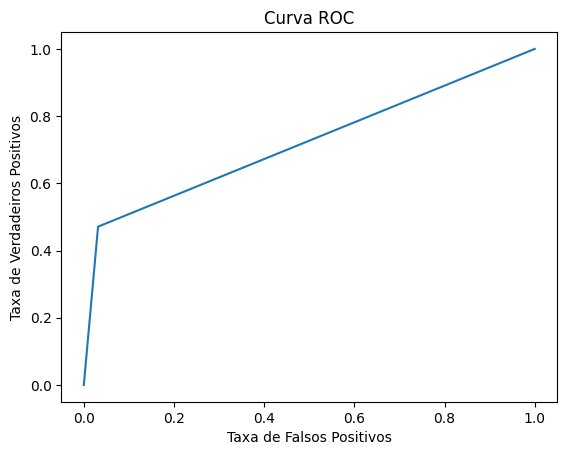

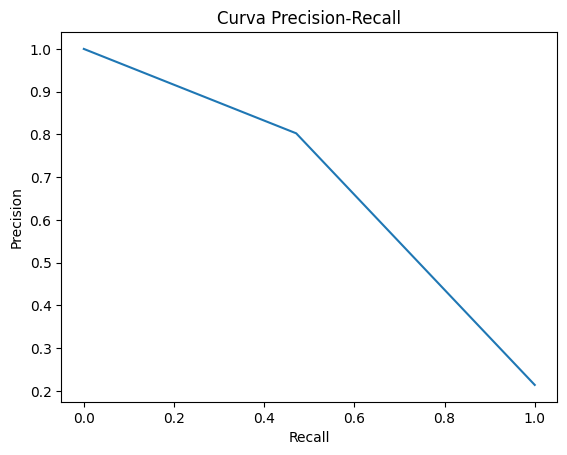

In [ ]:
model = GradientBoostingClassifier(
    n_estimators=120, max_depth=4, random_state=12345
)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print("F1:", f1_score(y_valid, y_pred))
print("AUC:", roc_auc_score(y_valid, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_valid, y_pred))
# Curva ROC
fpr, tpr, _ = roc_curve(y_valid, y_pred)
plt.plot(fpr, tpr)
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.show()
# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_valid, y_pred)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.show()


- De acordo com as métricas `F1`: 0.5936, `AUC`: 0.7197379372666524 e Matriz de Confusão: [[1903   62] [ 283  252]],
concluímos que o modelo Gradient Boosting Classifier apresenta um desempenho razoável na classificação dos dados.
- A métrica `F1` de 0.5936 indica um equilíbrio moderado entre precisão e recall, sugerindo que o modelo é capaz de identificar corretamente uma boa proporção de casos positivos, embora ainda haja espaço para melhorias.
- A métrica `AUC` de 0.7197 sugere que o modelo tem uma capacidade razoável de distinguir entre as classes positivas e negativas, mas não é excepcional.
- A Matriz de Confusão revela que o modelo tem um número significativo de falsos negativos (283), o que indica que há casos positivos que não estão sendo identificados corretamente.
- Em resumo, o modelo é útil, mas pode se beneficiar de ajustes adicionais ou da incorporação de mais dados ou características para melhorar sua precisão e capacidade de classificação.

In [ ]:
# Repetir o processo, mas agora com class_weight='balanced' para balancear os dados

for i in range(50, 101, 10):
    best_f1 = 0
    best_auc = 0
    for j in range(1, 11):
        model = GradientBoostingClassifier(
            n_estimators=i, max_depth=j, random_state=12345
        )
        # Calcular sample_weight para balanceamento
        class_weights = compute_class_weight(
            "balanced", classes=np.unique(y_train), y=y_train
        )
        sample_weights = np.array([
            class_weights[int(label)] for label in y_train
        ])

        model.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = model.predict(X_valid)
        if best_f1 < f1_score(y_valid, y_pred):
            best_f1 = f1_score(y_valid, y_pred)
            best_auc = roc_auc_score(y_valid, y_pred)
            best_params = (i, j)
    print(
        f"n_estimators: {i}, best max_depth: {best_params[1]}, best F1: {best_f1:.4f}, best AUC: {best_auc:.4f}"
    )


n_estimators: 50, best max_depth: 3, best F1: 0.6188, best AUC: 0.7894
n_estimators: 60, best max_depth: 4, best F1: 0.6223, best AUC: 0.7906
n_estimators: 60, best max_depth: 4, best F1: 0.6223, best AUC: 0.7906
n_estimators: 70, best max_depth: 4, best F1: 0.6200, best AUC: 0.7878
n_estimators: 70, best max_depth: 4, best F1: 0.6200, best AUC: 0.7878
n_estimators: 80, best max_depth: 4, best F1: 0.6240, best AUC: 0.7893
n_estimators: 80, best max_depth: 4, best F1: 0.6240, best AUC: 0.7893
n_estimators: 90, best max_depth: 4, best F1: 0.6279, best AUC: 0.7913
n_estimators: 90, best max_depth: 4, best F1: 0.6279, best AUC: 0.7913
n_estimators: 100, best max_depth: 4, best F1: 0.6262, best AUC: 0.7893
n_estimators: 100, best max_depth: 4, best F1: 0.6262, best AUC: 0.7893


- Encontramos a combinação ótima com n_estimators = 90 e max_depth = 4

F1: 0.6278713629402757
AUC: 0.7913200637321347
Matriz de Confusão:
 [[1604  361]
 [ 125  410]]


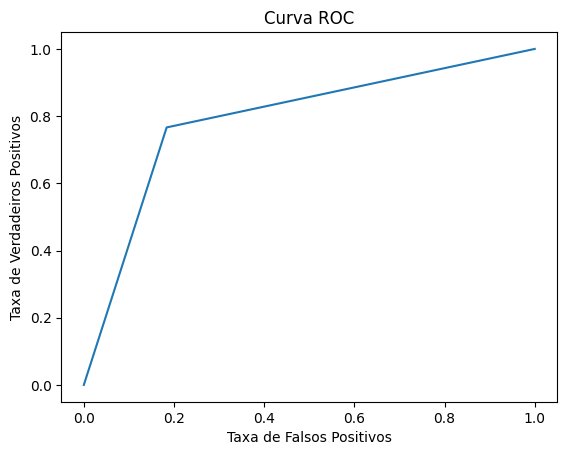

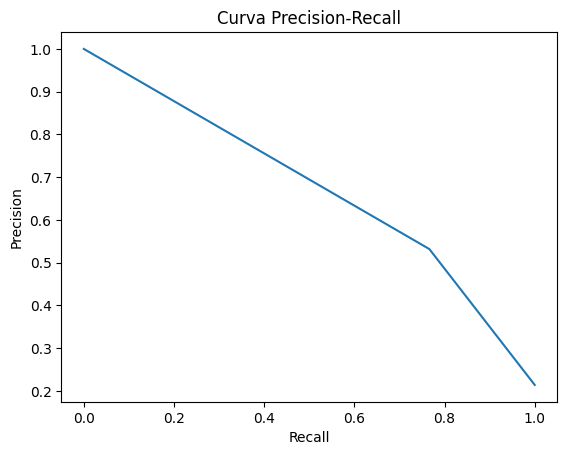

In [ ]:
model = GradientBoostingClassifier(
    n_estimators=90, max_depth=4, random_state=12345
)

# Calcular sample_weight para balanceamento
class_weights = compute_class_weight(
    "balanced", classes=np.unique(y_train), y=y_train
)
sample_weights = np.array([class_weights[int(label)] for label in y_train])

model.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = model.predict(X_valid)
print("F1:", f1_score(y_valid, y_pred))
print("AUC:", roc_auc_score(y_valid, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_valid, y_pred))
# Curva ROC
fpr, tpr, _ = roc_curve(y_valid, y_pred)
plt.plot(fpr, tpr)
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC - Class Weight Balanced")
plt.show()
# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_valid, y_pred)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - Class Weight Balanced")
plt.show()


- De acordo com as métricas `F1`: 0.6278, `AUC`: 0.7913 e Matriz de Confusão: [[1604   361] [ 125  410]], após realizar o balanceamento dos dados usando `class_weight='balanced'`, concluímos que o modelo Gradient Boosting Classifier apresenta uma melhoria no desempenho em comparação com a versão anterior.
- A métrica `F1` de 0.6278 indica um melhor equilíbrio entre precisão e recall, sugerindo que o modelo está conseguindo identificar uma proporção maior de casos positivos corretamente.
- A métrica `AUC` de 0.7913 sugere que o modelo tem uma capacidade aprimorada de distinguir entre as classes positivas e negativas, indicando um desempenho mais robusto.
- A Matriz de Confusão mostra uma redução significativa nos falsos negativos (125), o que é um sinal positivo de que o modelo está identificando mais casos positivos corretamente.
- Em resumo, o uso do balanceamento de classes melhorou o desempenho do modelo, tornando-o mais eficaz na classificação dos dados.

In [ ]:
# Repetir o processo, mas agora com oversampling da classe minoritária

# Separar as classes
X_train_df = pd.DataFrame(X_train)
X_train_df["target"] = y_train.values

# Separar por classe
class_0 = X_train_df[X_train_df["target"] == 0]
class_1 = X_train_df[X_train_df["target"] == 1]

# Sobreamostrar a classe minoritária
class_1_oversampled = resample(
    class_1,
    replace=True,  # amostragem com reposição
    n_samples=len(class_0),  # igualar ao tamanho da classe majoritária
    random_state=12345,
)

# Combinar as classes
X_train_balanced = pd.concat([class_0, class_1_oversampled])

# Separar features e target
y_train_balanced = X_train_balanced["target"]
X_train_balanced = X_train_balanced.drop("target", axis=1)

print(f"Distribuição original: {y_train.value_counts().to_dict()}")
print(f"Distribuição balanceada: {y_train_balanced.value_counts().to_dict()}")


Distribuição original: {0: 5998, 1: 1502}
Distribuição balanceada: {0: 5998, 1: 5998}


In [ ]:
# Buscar melhores hiperparâmetros com dados balanceados por RandomOverSampler
for i in range(50, 101, 10):
    best_f1 = 0
    best_auc = 0
    for j in range(1, 11):
        model = GradientBoostingClassifier(
            n_estimators=i, max_depth=j, random_state=12345
        )
        model.fit(X_train_balanced, y_train_balanced)
        y_pred = model.predict(X_valid)
        if best_f1 < f1_score(y_valid, y_pred):
            best_f1 = f1_score(y_valid, y_pred)
            best_auc = roc_auc_score(y_valid, y_pred)
            best_params = (i, j)
    print(
        f"n_estimators: {i}, best max_depth: {best_params[1]}, best F1: {best_f1:.4f}, best AUC: {best_auc:.4f}"
    )


n_estimators: 50, best max_depth: 3, best F1: 0.6182, best AUC: 0.7868
n_estimators: 60, best max_depth: 5, best F1: 0.6235, best AUC: 0.7834
n_estimators: 60, best max_depth: 5, best F1: 0.6235, best AUC: 0.7834
n_estimators: 70, best max_depth: 3, best F1: 0.6211, best AUC: 0.7888
n_estimators: 70, best max_depth: 3, best F1: 0.6211, best AUC: 0.7888
n_estimators: 80, best max_depth: 3, best F1: 0.6248, best AUC: 0.7908
n_estimators: 80, best max_depth: 3, best F1: 0.6248, best AUC: 0.7908
n_estimators: 90, best max_depth: 3, best F1: 0.6230, best AUC: 0.7883
n_estimators: 90, best max_depth: 3, best F1: 0.6230, best AUC: 0.7883
n_estimators: 100, best max_depth: 3, best F1: 0.6202, best AUC: 0.7854
n_estimators: 100, best max_depth: 3, best F1: 0.6202, best AUC: 0.7854


F1: 0.6248108925869894
AUC: 0.7908159140091793
Matriz de Confusão:
 [[1591  374]
 [ 122  413]]


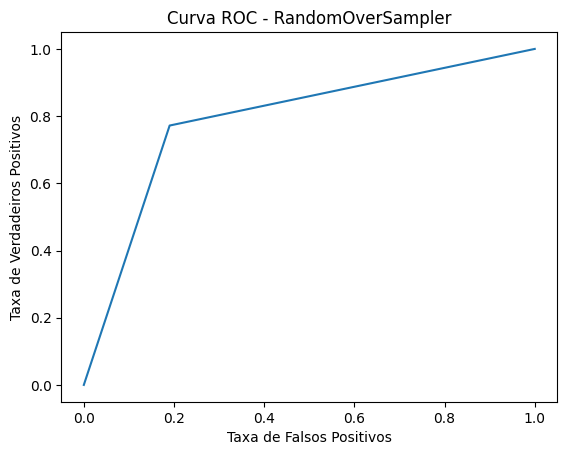

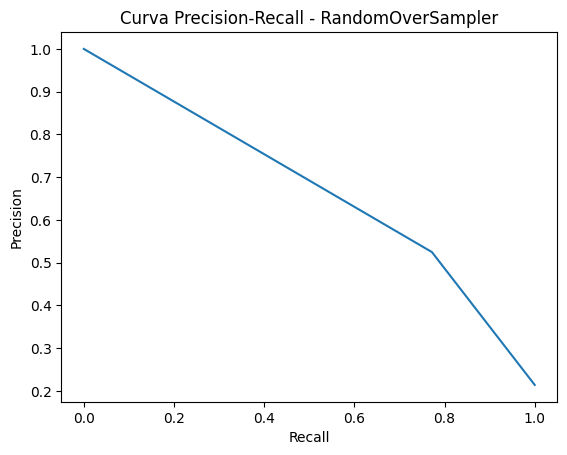

In [ ]:
# Treinar modelo final com RandomOverSampler
model = GradientBoostingClassifier(
    n_estimators=80, max_depth=3, random_state=12345
)
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_valid)
print("F1:", f1_score(y_valid, y_pred))
print("AUC:", roc_auc_score(y_valid, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_valid, y_pred))

# Curva ROC
fpr, tpr, _ = roc_curve(y_valid, y_pred)
plt.plot(fpr, tpr)
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC - RandomOverSampler")
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_valid, y_pred)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - RandomOverSampler")
plt.show()


- De acordo com as métricas `F1`: 0.6248, `AUC`: 0.7908 e `Matriz de Confusão`: [[1591   374] [ 122  413]], após realizar o balanceamento dos dados usando RandomOverSampler, concluímos que o modelo Gradient Boosting Classifier apresenta um desempenho superior ao da versão sem balanceamento.
- A métrica `F1` de 0.6248 indica um bom equilíbrio entre precisão e recall, sugerindo que o modelo está conseguindo identificar uma proporção significativa de casos positivos corretamente.
- A métrica `AUC` de 0.7908 sugere que o modelo tem uma capacidade sólida de distinguir entre as classes positivas e negativas, indicando um desempenho confiável.
- A Matriz de Confusão mostra uma redução nos falsos negativos (122), o que é um sinal positivo de que o modelo está identificando mais casos positivos corretamente.
- Em resumo, o uso do RandomOverSampler para balancear as classes melhorou o desempenho do modelo, tornando-o mais eficaz na classificação dos dados.

### Testando o Modelo com a melhor configuração:
- Modelo: Gradient Boosting Classifier
- Parâmetros: n_estimators = 90, max_depth = 4, class_weight = 'balanced'

In [ ]:
# Treinar o melhor modelo
best_model = GradientBoostingClassifier(
    n_estimators=90, max_depth=4, random_state=12345
)

# Calcular sample_weight para balanceamento
class_weights = compute_class_weight(
    "balanced", classes=np.unique(y_train), y=y_train
)
sample_weights = np.array([class_weights[int(label)] for label in y_train])

# Treinar o modelo
best_model.fit(X_train, y_train, sample_weight=sample_weights)

# Fazer predições
y_pred = best_model.predict(X_valid)
y_pred_proba = best_model.predict_proba(X_valid)[:, 1]

# Exibir métricas finais
print("=" * 50)
print("RESULTADOS DO MELHOR MODELO")
print("=" * 50)
print(f"F1 Score: {f1_score(y_valid, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_valid, y_pred):.4f}")
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_valid, y_pred)
print(cm)
print(f"\nVerdadeiros Negativos: {cm[0, 0]}")
print(f"Falsos Positivos: {cm[0, 1]}")
print(f"Falsos Negativos: {cm[1, 0]}")
print(f"Verdadeiros Positivos: {cm[1, 1]}")

# Análise de predições
print("\n" + "=" * 50)
print("ANÁLISE DE PREDIÇÕES DE CHURN")
print("=" * 50)

# Total de churns reais vs preditos
churns_reais = y_valid.sum()
churns_preditos = y_pred.sum()
print(f"\nTotal de Churns REAIS no conjunto de validação: {churns_reais}")
print(f"Total de Churns PREDITOS pelo modelo: {churns_preditos}")
print(f"Taxa de acerto em churns: {cm[1, 1] / churns_reais * 100:.2f}%")
print(
    f"Taxa de acerto em não-churns: {cm[0, 0] / (len(y_valid) - churns_reais) * 100:.2f}%"
)

# Exemplos de predições corretas e incorretas
print("\n" + "=" * 50)
print("EXEMPLOS DE PREDIÇÕES")
print("=" * 50)

# Criar DataFrame para análise
results_df = pd.DataFrame({
    "Real": y_valid.values,
    "Predito": y_pred,
    "Probabilidade_Churn": y_pred_proba,
})

# Verdadeiros Positivos (Acertou o Churn)
print("\nVERDADEIROS POSITIVOS (Churn corretamente identificado):")
vp = results_df[(results_df["Real"] == 1) & (results_df["Predito"] == 1)].head(
    5
)
print(vp)

# Falsos Negativos (Perdeu o Churn)
print("\nFALSOS NEGATIVOS (Churn não identificado - ERRO):")
fn = results_df[(results_df["Real"] == 1) & (results_df["Predito"] == 0)].head(
    5
)
print(fn)

# Falsos Positivos (Alarme falso)
print("\nFALSOS POSITIVOS (Previu churn mas cliente ficou - ERRO):")
fp = results_df[(results_df["Real"] == 0) & (results_df["Predito"] == 1)].head(
    5
)
print(fp)

print("\n" + "=" * 50)


RESULTADOS DO MELHOR MODELO
F1 Score: 0.6279
AUC-ROC: 0.7913

Matriz de Confusão:
[[1604  361]
 [ 125  410]]

Verdadeiros Negativos: 1604
Falsos Positivos: 361
Falsos Negativos: 125
Verdadeiros Positivos: 410

ANÁLISE DE PREDIÇÕES DE CHURN

Total de Churns REAIS no conjunto de validação: 535
Total de Churns PREDITOS pelo modelo: 771
Taxa de acerto em churns: 76.64%
Taxa de acerto em não-churns: 81.63%

EXEMPLOS DE PREDIÇÕES

VERDADEIROS POSITIVOS (Churn corretamente identificado):
    Real  Predito  Probabilidade_Churn
9      1        1             0.931718
11     1        1             0.820366
19     1        1             0.604200
25     1        1             0.614794
29     1        1             0.573119

FALSOS NEGATIVOS (Churn não identificado - ERRO):
     Real  Predito  Probabilidade_Churn
7       1        0             0.377286
33      1        0             0.297588
38      1        0             0.384916
60      1        0             0.352619
119     1        0           